In [1]:
print("Experiment No 03 : To perform data preprocessing and data visualization on iris dataset.")

Experiment No 03 : To perform data preprocessing and data visualization on iris dataset.


OUTPUT:


Dataset preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


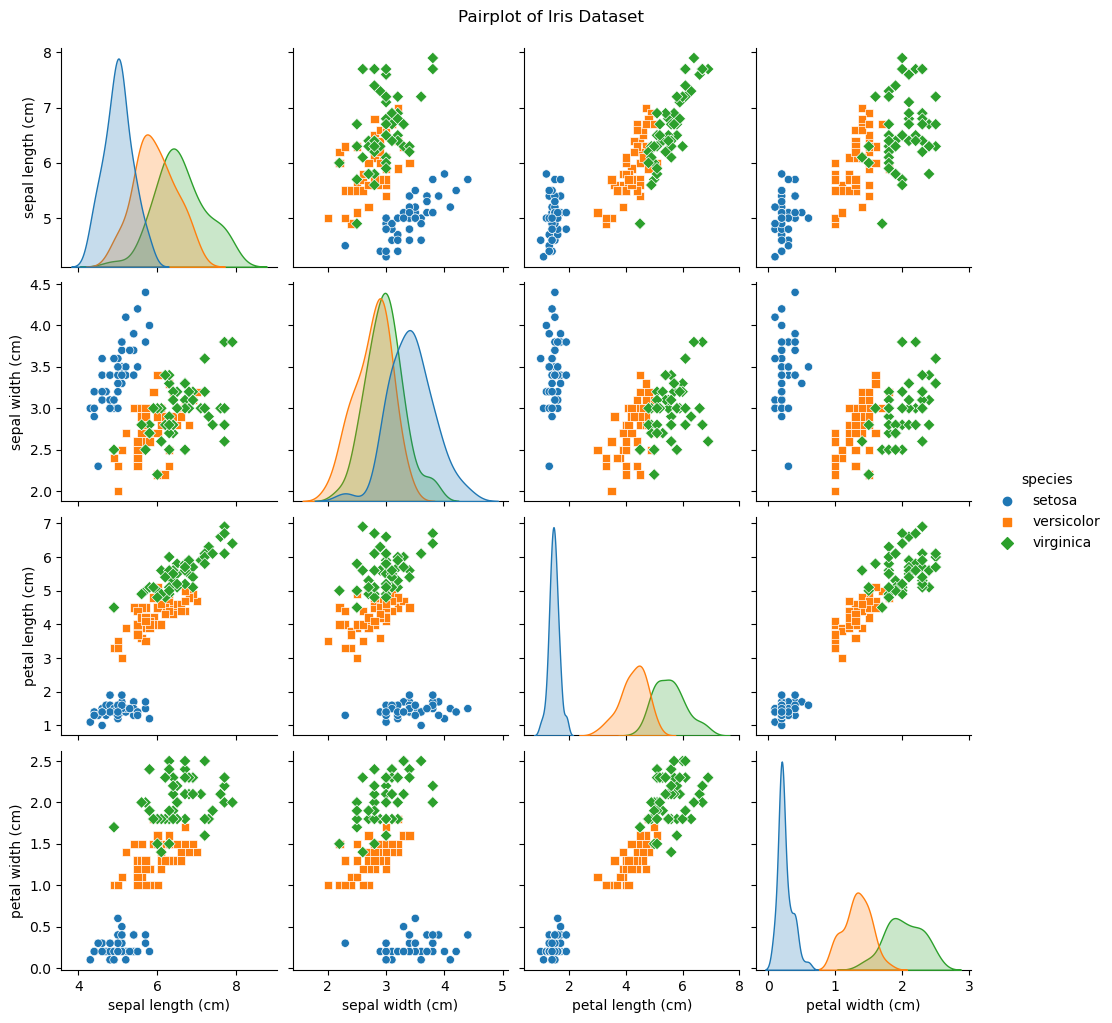

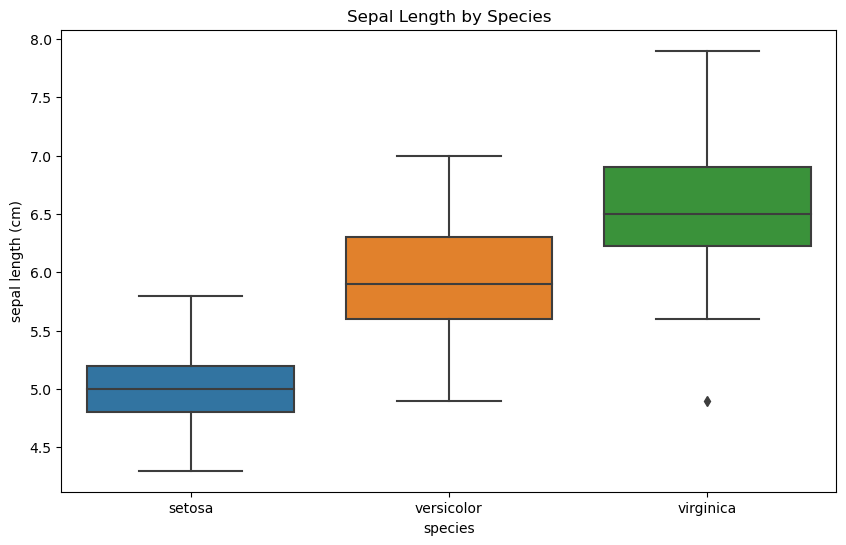

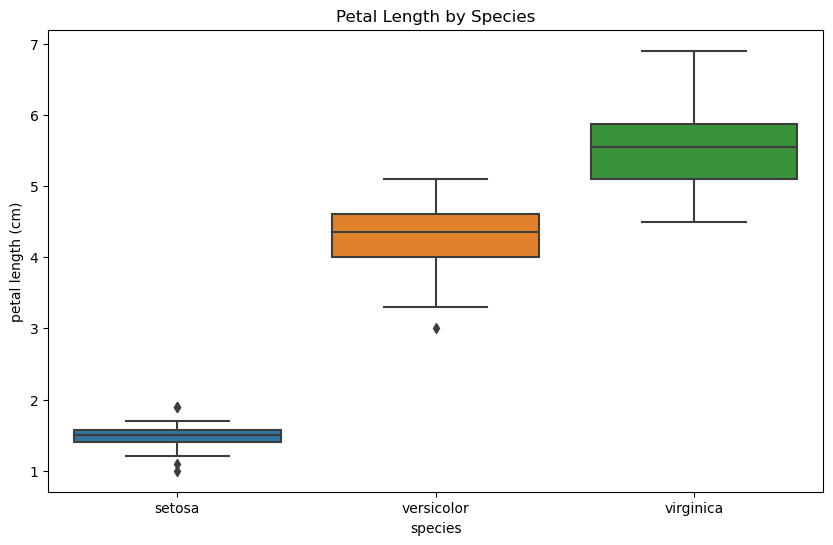

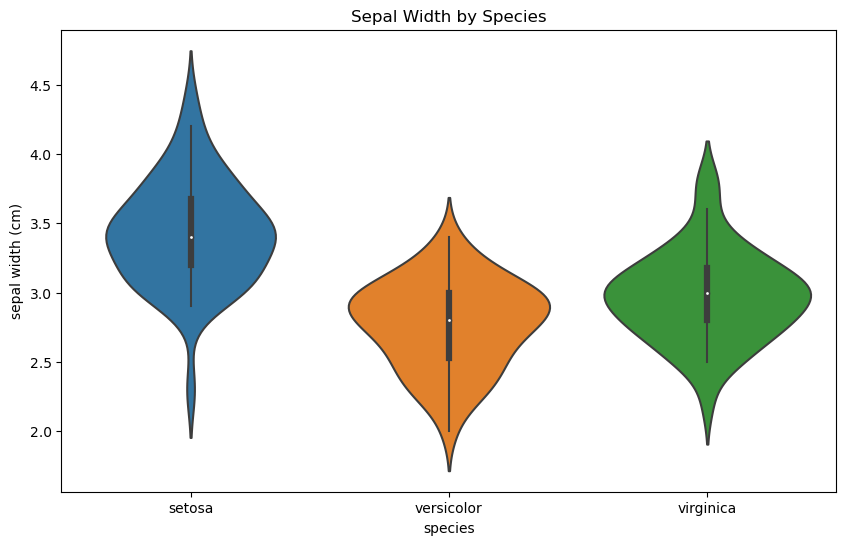

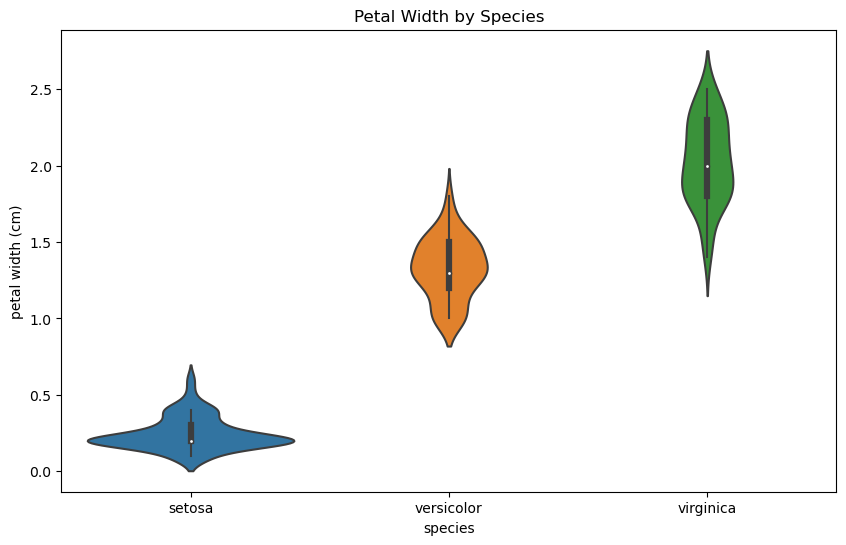

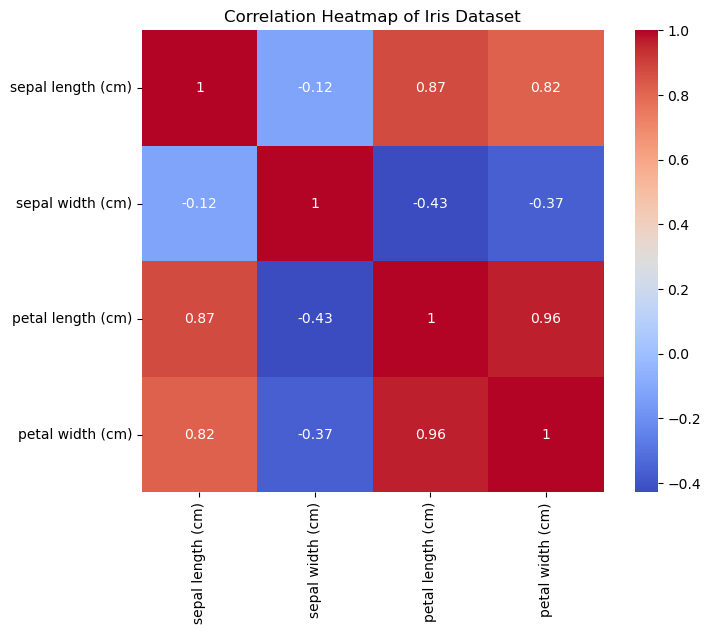

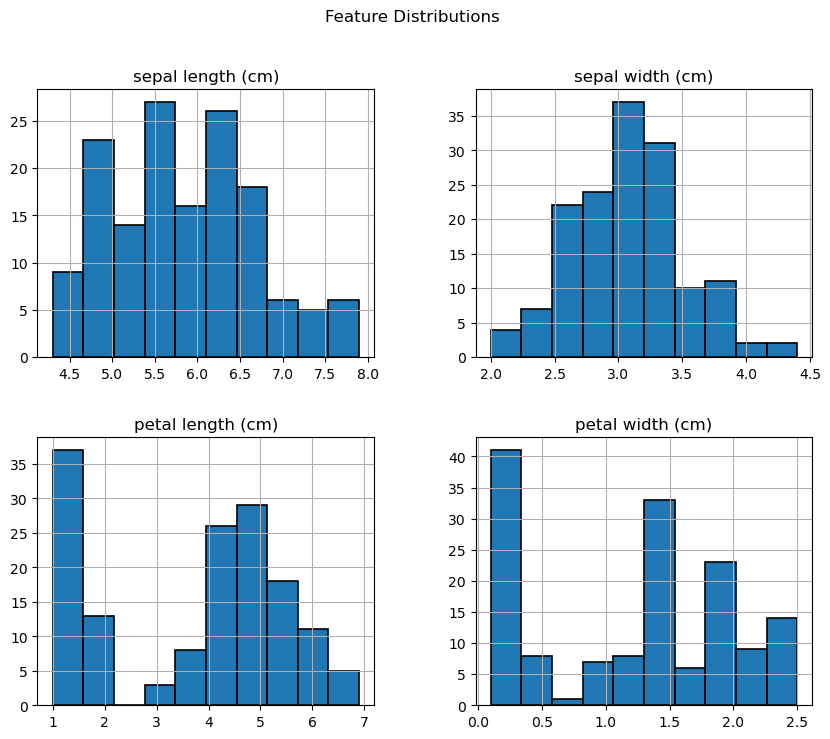

In [4]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print("OUTPUT:\n\n")

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

# Display basic information about the dataset
print("Dataset preview:")
print(df.head())
print("\nDataset summary:")
print(df.describe())
print("\nClass distribution:")
print(df['species'].value_counts())

# Data Preprocessing
# Separate features and target
X = df.iloc[:, :-1]  # Features (sepal and petal measurements)
y = df['species']    # Target (species)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData preprocessing complete.")

# Data Visualization

# Pair Plot
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Box Plot for Sepal Length and Petal Length by Species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title("Sepal Length by Species")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title("Petal Length by Species")
plt.show()

# Violin Plot for Sepal Width and Petal Width by Species
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='sepal width (cm)', data=df)
plt.title("Sepal Width by Species")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal width (cm)', data=df)
plt.title("Petal Width by Species")
plt.show()

# Heatmap of Correlation Matrix (excluding species column)
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

# Histograms of Each Feature
df.iloc[:, :-1].hist(edgecolor='black', linewidth=1.2, figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.show()
